In [1]:
import os
import pandas as pd
%matplotlib inline
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anna/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = os.getenv("newsapikey")

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Set start and end datetimes of for 30 days allowed access to articles
from datetime import datetime, timedelta
end_date = datetime.now()
start_date = end_date + timedelta(-30)

In [6]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    from_param=start_date,
    to=end_date,
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Print number articles found for reference
print(f"Total articles related to Bitcoin: {btc_news['totalResults']}")

Total articles related to Bitcoin: 3422


In [7]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    from_param=start_date,
    to=end_date,
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Print number articles found for reference 
print(f"Total articles related to Ethereum: {eth_news['totalResults']}")

Total articles related to Ethereum: 822


In [8]:
# Create the Bitcoin sentiment scores DataFrame
#bitcoin sentiment list to dataframe
#sentiment_df=pd.DataFrame()
#sentiment_df.columns=["Compound","Negative","Neutral","Positive","text"]
btc_sentiment_list=[]
for article in btc_news["articles"]:        
   try: 
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        scores={"Compound":compound, "Negative":neg, "Neutral":neu, "Positive":pos, "text":text}
        btc_sentiment_list.append(scores)
        
   except: 
        pass

btc_sentiment_df=pd.DataFrame(btc_sentiment_list)
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...
1,0.3182,0.000,0.933,0.067,"Yesterday, the prominent bitcoin investor Mich..."
2,0.2716,0.000,0.939,0.061,"Early next week, Bitcoin is about to experienc..."
3,0.0000,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...
4,-0.5859,0.134,0.866,0.000,Since the first Bitcoin block was generated ba...


In [9]:
# Create the ethereum sentiment scores DataFrame
eth_sentiment_list=[]
for article in eth_news["articles"]:        
   try: 
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        scores={"Compound":compound, "Negative":neg, "Neutral":neu, "Positive":pos, "text":text}
        eth_sentiment_list.append(scores)
        
   except: 
        pass

eth_sentiment_df=pd.DataFrame(eth_sentiment_list)
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...
1,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...
2,0.6249,0.000,0.859,0.141,Use this to send Ether from one account to ano...
3,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou..."
4,0.0000,0.148,0.703,0.148,With unemployment surging and businesses strug...


In [10]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,88.000000,88.000000,88.000000,88.000000
mean,0.168519,0.040125,0.884614,0.075295
std,0.443852,0.063688,0.082204,0.072731
min,-0.848100,0.000000,0.629000,0.000000
25%,0.000000,0.000000,0.830500,0.000000
50%,0.296000,0.000000,0.910000,0.074000
75%,0.507000,0.068000,0.933000,0.095250
max,0.919800,0.244000,1.000000,0.335000


In [11]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.250705,0.029313,0.881583,0.089094
std,0.372760,0.049098,0.089088,0.075696
min,-0.807400,0.000000,0.607000,0.000000
25%,0.000000,0.000000,0.822250,0.000000
50%,0.289200,0.000000,0.879000,0.101500
75%,0.592525,0.056000,0.946000,0.130000
max,0.919800,0.223000,1.000000,0.335000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score of 0.081, but Bitcoin was really close for positive sentiment mean at 0.075.

Q: Which coin had the highest compound score?

A: Both coins had a max compound score of 0.92.

Q. Which coin had the highest positive score?

A: Both coins had a max positive score of 0.34.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary
stop_words=set(stopwords.words('english'))

In [14]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/anna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
text=btc_sentiment_df.text[87]
type(text)

str

In [43]:
btc_sentiment_df['text'].iloc[0]

"J.K. Rowling has been drinking a lot and you'd better believe she has some thoughts on Bitcoin.\r\nNotedTERF and author of The Cuckoos Calling, Rowlingdecided Friday was the perfect time to learn about… [+2124 chars]"

In [141]:
# Complete the tokenizer function
def tokenizer(sentiment_data):
   # """Tokenizes text."""
    tokens_list=[] 
    for row in sentiment_data['text']: 
        text_block=row
        sentence_tokenized=sent_tokenize(text_block)
        # Create a list of the words
        tokenized_words=[word_tokenize(sentence) for sentence in sentence_tokenized]

        # Convert the words to lowercase
        first_result=[word.lower() for word in tokenized_words[0] if word.lower() not in stop_words]
        #print(first_result)

        # Remove the punctuation
        second_result= [word for word in first_result if word.isalnum()]

        # Remove the stop words
        third_result= [word for word in second_result if not word in stop_words]

        # Lemmatize Words into root words
        # Instantiate the lemmatizer
        lemmatizer = WordNetLemmatizer()
        lem_words=[lemmatizer.lemmatize(word) for word in third_result]

        tokens={"token":lem_words}
        tokens_list.append(tokens)  
        
    return tokens_list

In [142]:
btc_tokens=tokenizer(btc_sentiment_df)
btc_tokens[0]

{'token': ['rowling',
  'drinking',
  'lot',
  'better',
  'believe',
  'thought',
  'bitcoin']}

In [143]:
# Create a new tokens column for bitcoin
from pandas import DataFrame
btc_tokens_df=pd.DataFrame(btc_tokens)
btc_tokens_df.head()

,token
0,"[rowling, drinking, lot, better, believe, thou..."
1,"[yesterday, prominent, bitcoin, investor, mich..."
2,"[early, next, week, bitcoin, experience, halvi..."
3,"[last, week, eye, crypto, world, glued, halven..."
4,"[since, first, bitcoin, block, generated, back..."


In [110]:
# Create a new tokens column for bitcoin and join to bitcoin sentiment df
btc_sentiment_df=pd.concat([btc_sentiment_df,btc_tokens_df], axis=1, join="inner")
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text,token,token,token,token,token
0,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...,"[Rowling, drinking, lot, better, believe, thou...","[Rowling, drinking, lot, better, believe, thou...","[Rowling, drinking, lot, better, believe, thou...","[Rowling, drinking, lot, better, believe, thou...","[Rowling, drinking, lot, better, believe, thou..."
1,0.3182,0.000,0.933,0.067,"Yesterday, the prominent bitcoin investor Mich...","[Yesterday, prominent, bitcoin, investor, Mich...","[Yesterday, prominent, bitcoin, investor, Mich...","[Yesterday, prominent, bitcoin, investor, Mich...","[Yesterday, prominent, bitcoin, investor, Mich...","[Yesterday, prominent, bitcoin, investor, Mich..."
2,0.2716,0.000,0.939,0.061,"Early next week, Bitcoin is about to experienc...","[Early, next, week, Bitcoin, experience, halvi...","[Early, next, week, Bitcoin, experience, halvi...","[Early, next, week, Bitcoin, experience, halvi...","[Early, next, week, Bitcoin, experience, halvi...","[Early, next, week, Bitcoin, experience, halvi..."
3,0.0000,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...,"[Over, last, week, eye, crypto, world, glued, ...","[Over, last, week, eye, crypto, world, glued, ...","[Over, last, week, eye, crypto, world, glued, ...","[Over, last, week, eye, crypto, world, glued, ...","[Over, last, week, eye, crypto, world, glued, ..."
4,-0.5859,0.134,0.866,0.000,Since the first Bitcoin block was generated ba...,"[Since, first, Bitcoin, block, generated, back...","[Since, first, Bitcoin, block, generated, back...","[Since, first, Bitcoin, block, generated, back...","[Since, first, Bitcoin, block, generated, back...","[Since, first, Bitcoin, block, generated, back..."


In [144]:
eth_tokens=tokenizer(eth_sentiment_df)
eth_tokens[0]

{'token': ['editor',
  'note',
  'andreessen',
  'horowitz',
  'crypto',
  'startup',
  'school',
  'brought',
  'together',
  '45',
  'participant',
  'around',
  'overseas',
  'course',
  'learn',
  'build',
  'crypto',
  'company']}

In [145]:
# Create a new tokens column for bitcoin
from pandas import DataFrame
eth_tokens_df=pd.DataFrame(eth_tokens)
eth_tokens_df.head()

,token
0,"[editor, note, andreessen, horowitz, crypto, s..."
1,"[developer, looking, quickly, build, identity,..."
2,"[use, send, ether, one, account, another, smar..."
3,"[group, linux, foundation, deal]"
4,"[unemployment, surging, business, struggling, ..."


In [146]:
# Create a new tokens column for ethereum
eth_sentiment_df=pd.concat([eth_sentiment_df,eth_tokens_df], axis=1, join="inner")
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text,token,token
0,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...,"[Editors, note, Andreessen, Horowitzs, Crypto,...","[editor, note, andreessen, horowitz, crypto, s..."
1,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...,"[For, developer, looking, quickly, build, iden...","[developer, looking, quickly, build, identity,..."
2,0.6249,0.000,0.859,0.141,Use this to send Ether from one account to ano...,"[Use, send, Ether, one, account, another, smar...","[use, send, ether, one, account, another, smar..."
3,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou...","[Some, group, The, Linux, Foundation, deal]","[group, linux, foundation, deal]"
4,0.0000,0.148,0.703,0.148,With unemployment surging and businesses strug...,"[With, unemployment, surging, business, strugg...","[unemployment, surging, business, struggling, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [114]:
from collections import Counter
from nltk import ngrams

In [147]:
btc_tokens[0]

{'token': ['rowling',
  'drinking',
  'lot',
  'better',
  'believe',
  'thought',
  'bitcoin']}

In [158]:
#trying to make list of dictionarys containing strings as values into one big string
#get list of all tokens as a single string for bitcoin articles
btc_big_token_list=[]
for dictionary in btc_tokens:
    btc_big_token_list.extend(dictionary['token'])
#get list of all tokens as a single string for ethereum articles
eth_big_token_list=[]
for dictionary in eth_tokens:
    eth_big_token_list.extend(dictionary['token'])

In [161]:
def ngram_count(token_list): 
    # Make all articles in the text to one single string
    bigrams = ngrams(token_list, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return list(top_10.items())

In [162]:
# Generate the Bitcoin N-grams where N=2
ngram_count(btc_big_token_list)

[(('bitcoin', 'btc'), 18),
 (('robot', 'colleague'), 15),
 (('colleague', 'satoshi'), 15),
 (('satoshi', 'nakaboto'), 15),
 (('nakaboto', 'writes'), 15),
 (('writes', 'bitcoin'), 15),
 (('every', 'fucking'), 15),
 (('fucking', 'day'), 15),
 (('btc', 'every'), 14),
 (('day', 'robot'), 11)]

In [163]:
# Generate the Ethereum N-grams where N=2
ngram_count(eth_big_token_list)

[(('day', 'ahead'), 18),
 (('ahead', 'ethereum'), 18),
 (('ethereum', 'would'), 18),
 (('would', 'need'), 18),
 (('level', 'bring'), 18),
 (('major', 'resistance'), 18),
 (('resistance', 'level'), 18),
 (('level', 'play'), 18),
 (('bring', 'first'), 17),
 (('first', 'major'), 17)]

In [165]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(token_list, N=10):
    """Returns the top N tokens from the frequency count"""
    # Combine all articles in corpus into one large string
    return Counter(token_list).most_common(N)

In [169]:
# Get the top 10 words for Bitcoin
btc_top10=token_count(btc_big_token_list,N=10)
btc_top10

[('bitcoin', 57),
 ('char', 20),
 ('btc', 19),
 ('every', 19),
 ('day', 18),
 ('satoshi', 17),
 ('robot', 15),
 ('colleague', 15),
 ('nakaboto', 15),
 ('writes', 15)]

In [170]:
# Get the top 10 words for Ethereum
eth_top10=token_count(eth_big_token_list,N=10)
eth_top10

[('ethereum', 40),
 ('level', 38),
 ('day', 20),
 ('major', 20),
 ('first', 20),
 ('need', 19),
 ('resistance', 19),
 ('play', 19),
 ('ahead', 19),
 ('would', 18)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [172]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

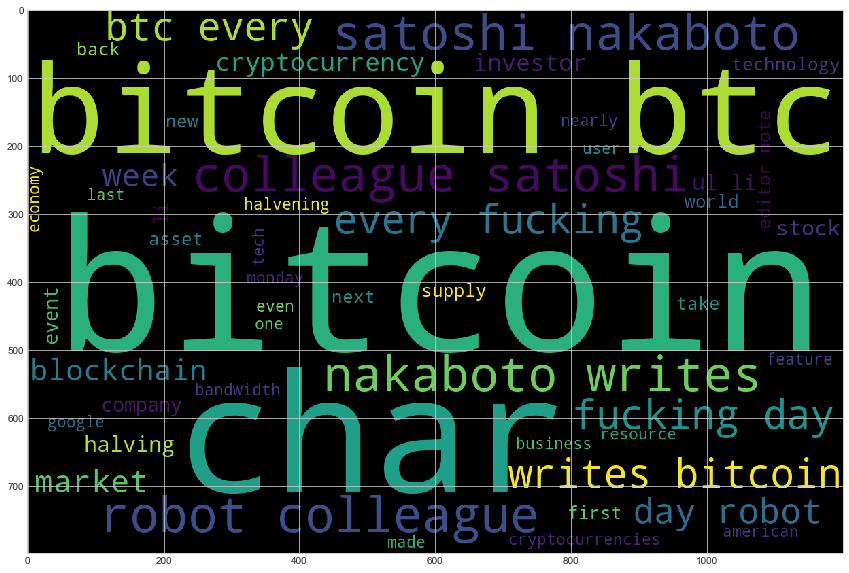

In [177]:
# Generate the Bitcoin word cloud
# put all the text together to get a string to look at for the word clound
input_text = ' '.join(btc_big_token_list)
btc_wc = WordCloud(width=1200, height=800, max_words=50).generate(input_text)
plt.imshow(btc_wc)


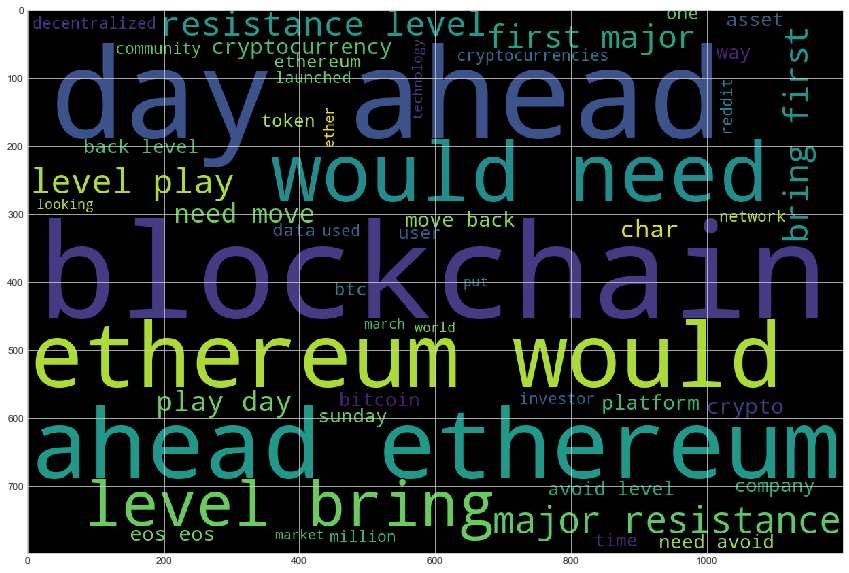

In [176]:
# Generate the Ethereum word cloud
input_text = ' '.join(eth_big_token_list)
eth_wc = WordCloud(width=1200, height=800, max_words=50).generate(input_text)
plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together

'Cryptocurrency exchange Binance has resumed trading activity. Users can now cancel open orders, deposit crypto assets into their Binance account, and of course buy and sell cryptocurrencies. You cant withdraw crypto assets to an external wallet just yet, but … [+1191 chars]Bitcoin is now trading at around $8,130, up a whopping 60.84 percent over the past month, with the price surging $3,086.14 over the period.\r\nThe cryptocurrency’s meteoric rise is reminiscent of its rocketing growth in the latter half of 2017, when prices reac… [+4311 chars]Binance has vowed to raise the quality of its security in the aftermath of a hack that saw thieves make off with over $40 million in Bitcoin from the exchange.\r\nThe company — which is widely believed to operate the world’s largest crypto exchange based on tra… [+2269 chars]A new payment network called Flexa is launching today that’ll let you spend cryptocurrencies in physical stores. The technology currently supports bitcoin, ether, bitcoin ca

In [31]:
# Run the NER processor on all of the text

# Add a title to the document

In [32]:
# Render the visualization

In [33]:
# List all Entities

Binance PERSON
Binance GPE
around $8,130 MONEY
60.84 percent PERCENT
the past month DATE
3,086.14 MONEY
the latter half of 2017 DATE
$40 million MONEY
Bitcoin GPE
Flexa ORG
today DATE
GameStop ORG
Nordstrom NORP
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
$15 million MONEY
Europol PERSON
three CARDINAL
second ORDINAL
more than €550,000 MONEY
around $615,000 MONEY
last week DATE
’m PERSON
May 7 DATE
about 10,000 CARDINAL
Baltimore GPE
RobbinHood ORG
13 CARDINAL
76,280 MONEY
today DATE
102,310 MONEY
Binance PERSON
last week's DATE
7,000 CARDINAL
roughly $40 million MONEY
Monday DATE
Binance GPE
one CARDINAL
about 7,000 CARDINAL
around $40 million MONEY
Bloomb PERSON
Tether PERSON
New Yorks GPE
month DATE
California GPE
Maine GPE
New York GPE
Albany GPE
Peter da Silva PERSON
the National Academy of Sciencies ORG
1965 DATE
Bitcoin BTC ORG
Tether ORG
Bitcoin GPE
Bitcoin GPE
the Wall Street Market FAC
European NORP
U.S. GPE
Millions 

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text

# Add a title to the document

In [36]:
# Render the visualization

In [37]:
# List all Entities

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f